In [62]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [63]:
image = cv2.imread('./2.jpg')
original = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

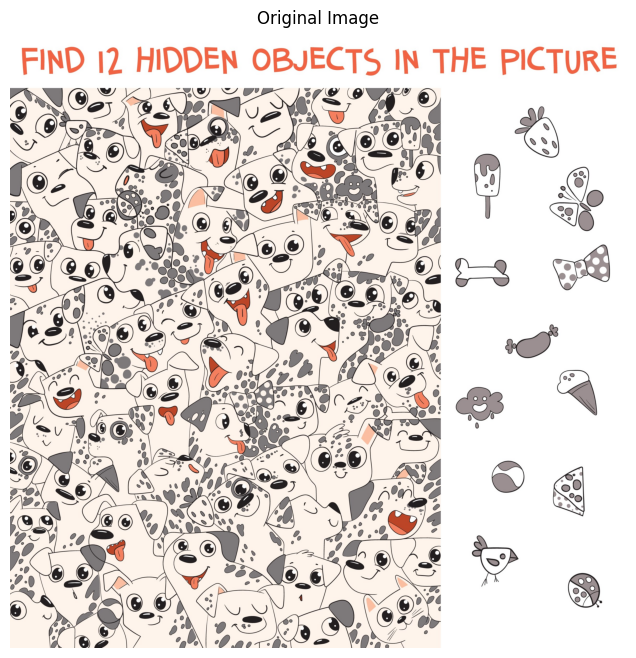

In [64]:
plt.figure(figsize=(8, 8))
plt.imshow(original)
plt.title("Original Image")
plt.axis('off')
plt.show()

In [65]:
objects = []

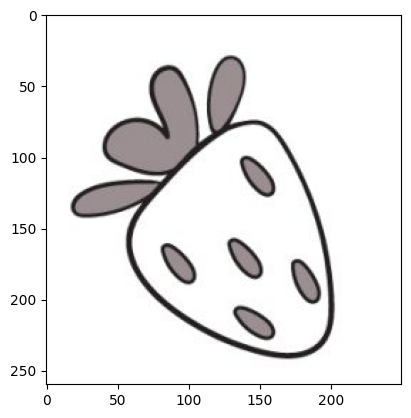

In [66]:
strawberry = original[280:540, 2080:2330]
plt.imshow(strawberry)
objects.append(strawberry)

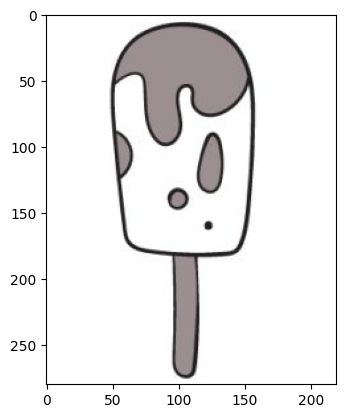

In [67]:
ice_cream = original[500:780, 1880:2100]
plt.imshow(ice_cream)
objects.append(ice_cream)

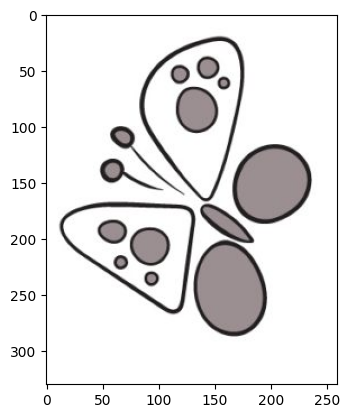

In [68]:
butterfly = original[540:870, 2230:2490]
plt.imshow(butterfly)
objects.append(butterfly)

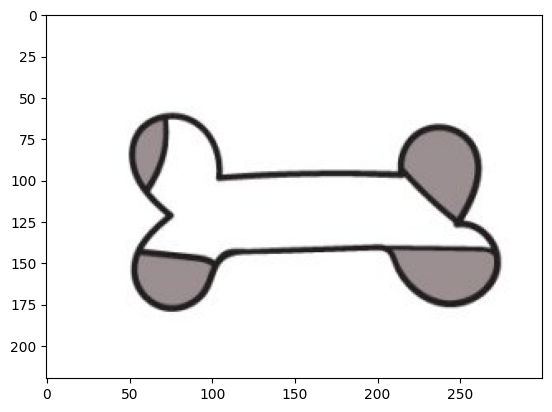

In [69]:
bone = original[880:1100, 1800:2100]
plt.imshow(bone)
objects.append(bone)

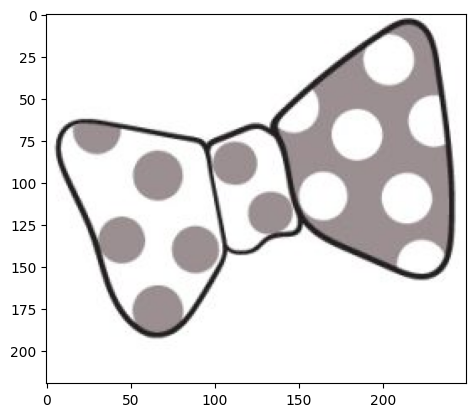

In [70]:
tie = original[880:1100, 2250:2500]
plt.imshow(tie)
objects.append(tie)

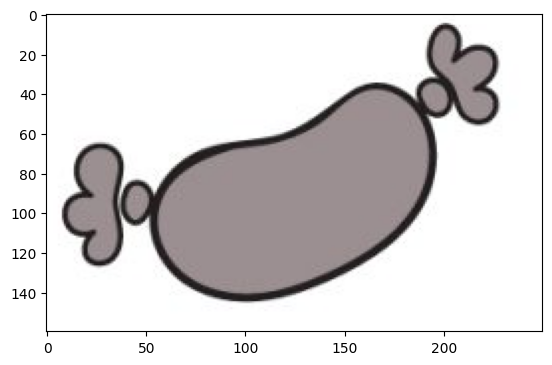

In [71]:
hotdog = original[1210:1370, 2050:2300]
plt.imshow(hotdog)
objects.append(hotdog)

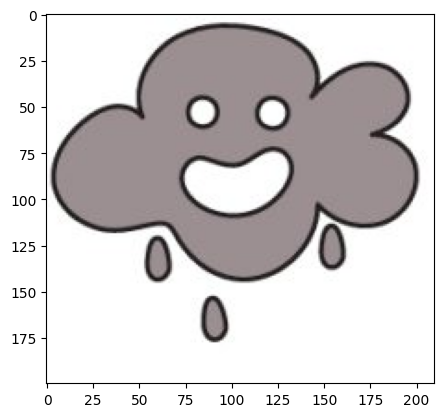

In [72]:
cloud = original[1470:1670, 1850:2060]
plt.imshow(cloud)
objects.append(cloud)

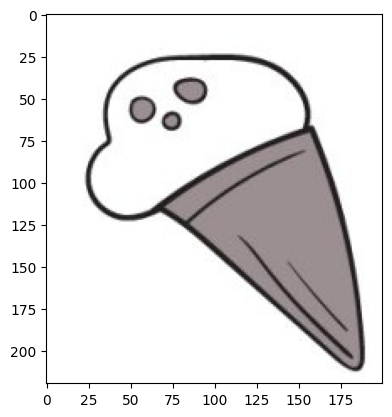

In [73]:
ice_cream2 = original[1380:1600, 2250:2450]
plt.imshow(ice_cream2)
objects.append(ice_cream2)

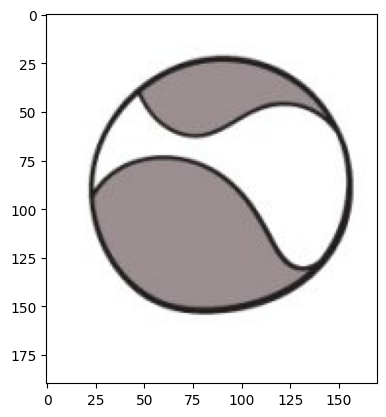

In [74]:
ball = original[1760:1950, 1980:2150]
plt.imshow(ball)
objects.append(ball)

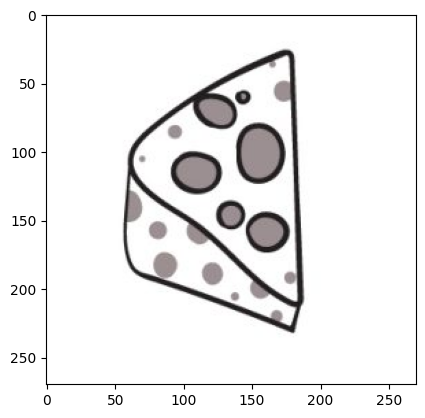

In [75]:
cheese = original[1780:2050, 2200:2470]
plt.imshow(cheese)
objects.append(cheese)

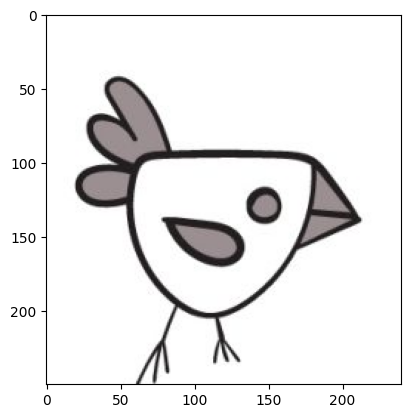

In [76]:
bird = original[2050:2300, 1900:2140]
plt.imshow(bird)
objects.append(bird)

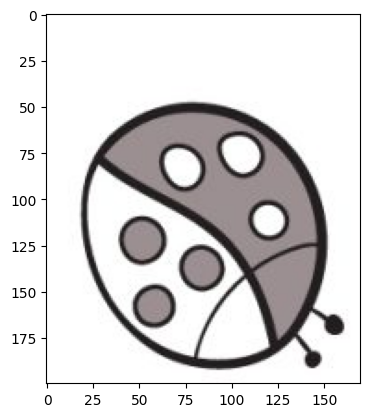

In [77]:
bug = original[2200:2400, 2300:2470]
plt.imshow(bug)
objects.append(bug)

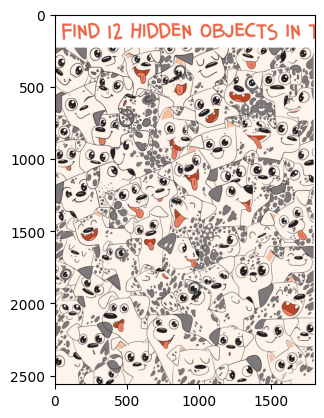

In [78]:
target = original[0:original.shape[0], 0:1800]

plt.imshow(target)

In [79]:
def find(image, template, scale_min=0.5, scale_max=1.0, scale_steps=50):
    # Chuyển ảnh về grayscale nếu chưa phải
    if len(image.shape) == 3:
        image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        image_gray = image.copy()

    if len(template.shape) == 3:
        template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
    else:
        template_gray = template.copy()
    
    # Chuyển đổi ảnh gốc và template sang ảnh xám (grayscale)
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

    # Tạo mask nhị phân cho template để highlight vùng non-background
    _, mask = cv2.threshold(template_gray, 240, 255, cv2.THRESH_BINARY_INV)

    # Khởi tạo biến lưu best match
    best_scale = None # Tỷ lệ scale tốt nhất của template
    best_min_val = float('inf')  # Initialize with a very large number
    best_top_left = None # Tọa độ góc trái của vùng best match
    best_template_w, best_template_h = None, None # shape template sau khi resize

    # Tạo loop danh sách các tỷ lệ scale từ scale_min đến scale_max
    scale_factors = np.linspace(scale_min, scale_max, scale_steps)  # Scale factors from scale_min to scale_max
    
    for scale_factor in scale_factors:
        # Resize template theo tỷ lệ hiện tại
        new_width = int(template.shape[1] * scale_factor)
        new_height = int(template.shape[0] * scale_factor)
        
        # Resize template và mask theo kích thước mới
        resized_template = cv2.resize(template_gray, (new_width, new_height), interpolation=cv2.INTER_AREA)
        resized_mask = cv2.resize(mask, (new_width, new_height), interpolation=cv2.INTER_AREA)
        
        result = cv2.matchTemplate(image_gray, resized_template, cv2.TM_SQDIFF_NORMED, mask=resized_mask)
                
        # Thực hiện so khớp template bằng phương pháp SQDIFF_NORMED
        min_val, _, min_loc, _ = cv2.minMaxLoc(result)
        
        # Cập nhật giá trụ khi tìm thấy khớp tốt hơn
        if min_val < best_min_val:
            best_min_val = min_val
            best_scale = scale_factor
            best_top_left = min_loc
            best_template_w, best_template_h = resized_template.shape[:2]

    # Vẽ bounding box lên vị trí tìm được tốt nhất
    if best_top_left is not None:
        top_left = best_top_left
        bottom_right = (top_left[0] + best_template_h, top_left[1] + best_template_w)
        return top_left, bottom_right, best_scale, best_min_val
    
    return None

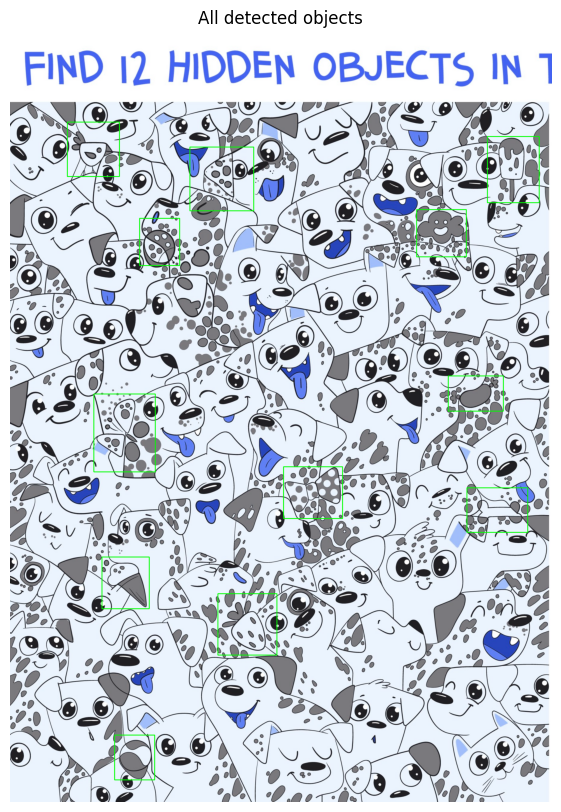

In [81]:
image_copy = target.copy()

for obj in objects:
    result = find(image_copy, obj)
    if result:
        top_left, bottom_right, _, _ = result
        cv2.rectangle(image_copy, top_left, bottom_right, (0, 255, 0), 2)  # Vẽ khung xanh lá

# Chuyển ảnh từ BGR sang RGB để hiển thị với matplotlib
image_copy_rgb = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

# Hiển thị ảnh kết quả
plt.figure(figsize=(10, 10))
plt.imshow(image_copy_rgb)
plt.title("All detected objects")
plt.axis('off')
plt.show()

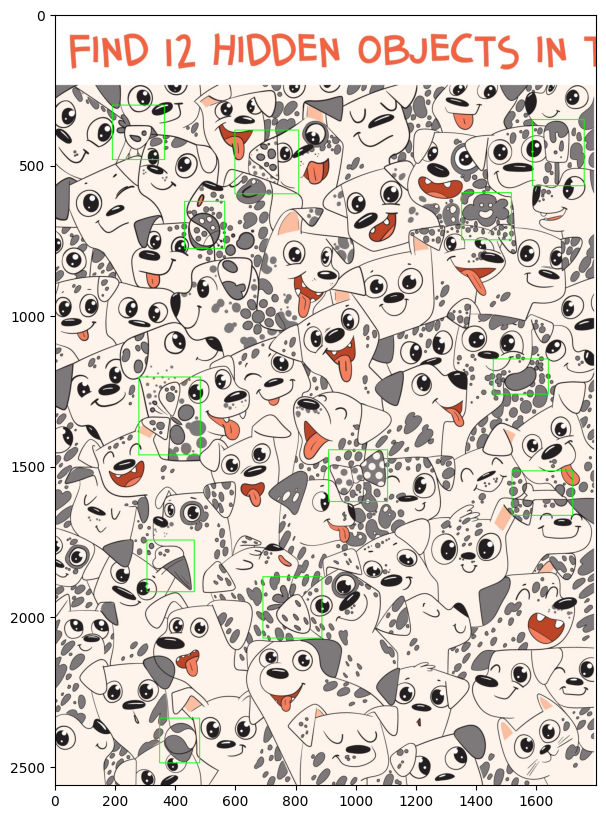

In [84]:
detect = cv2.cvtColor(image_copy_rgb, cv2.COLOR_RGB2BGR)
plt.figure(figsize=(10, 10))
plt.imshow(detect)
plt.show()